# Análisis de precios de autos

El siguiente análisis modela la relación entre diversas características de una serie de automóviles con sus respectivos precios. El dataset utilizado se encuentra disponible en https://www.kaggle.com/hellbuoy/car-price-prediction.

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de dataset

In [2]:
df = pd.read_csv(r"./CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

### Preprocesado de datos

In [4]:
df1 = df

remove = ["car_ID", "CarName"]

df1 = df1.drop(remove, axis = 1)

In [5]:
categoricas = ["symboling", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel",
               "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

for var in categoricas:
    dummy = pd.get_dummies(df1[var], prefix=var)
    df1 = pd.concat([df1, dummy], axis = 1)
    
df1 = df1.drop(categoricas, axis = 1)

In [6]:
df1.columns.values

array(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1

In [7]:
df1.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df1.shape

(205, 58)

In [9]:
df = df1

El dataset presenta 205 muestras y 58 columnas

### Declaración de variables predictoras y target

In [10]:
target = ["price"]
predictoras = [x for x in df.columns.values if x not in target]

x = df[predictoras]
y = df[target]

### Visualización en gráfico de dispersión

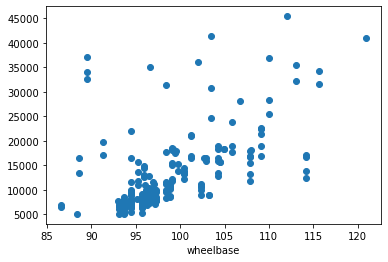

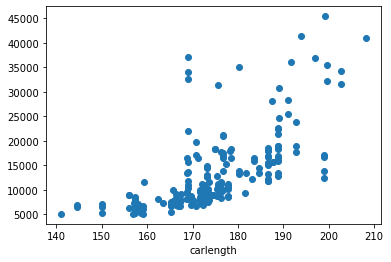

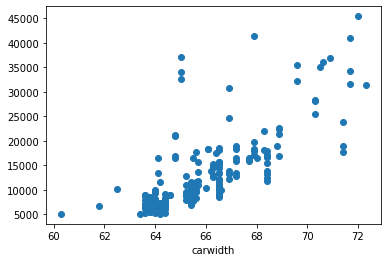

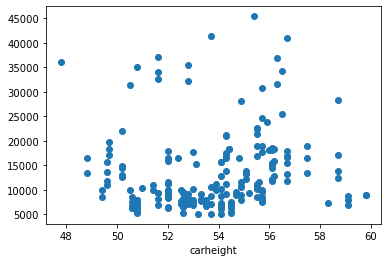

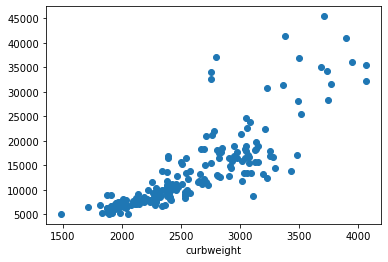

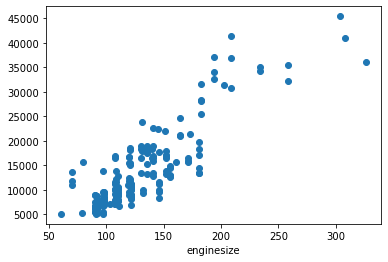

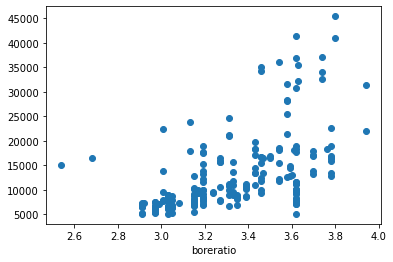

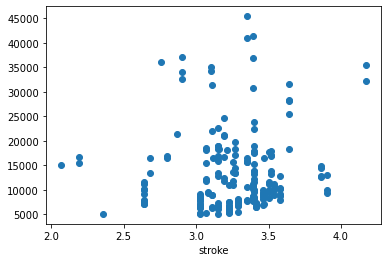

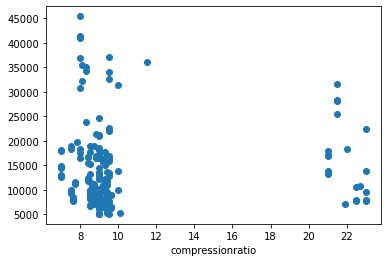

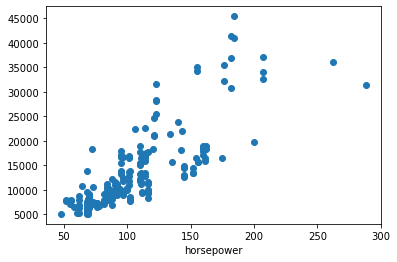

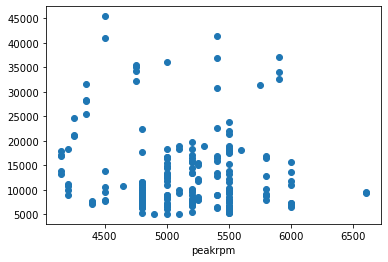

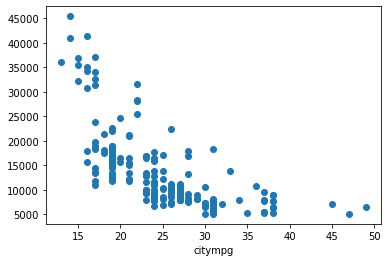

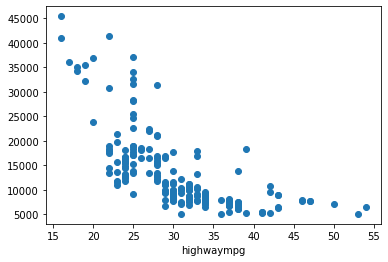

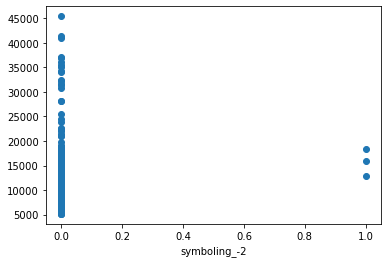

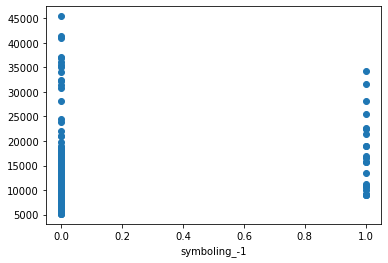

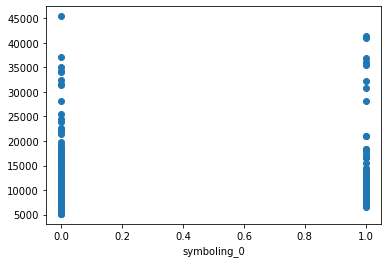

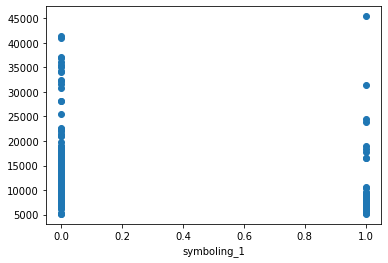

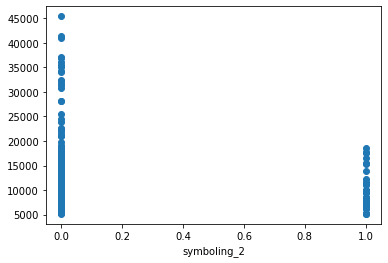

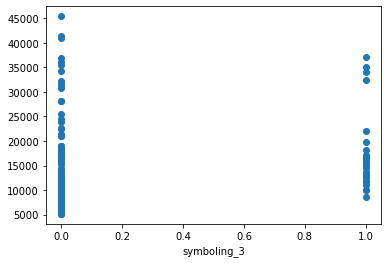

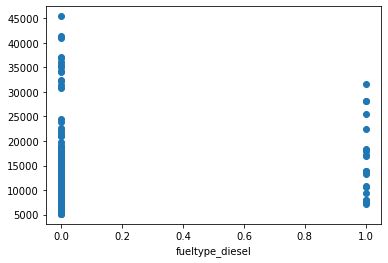

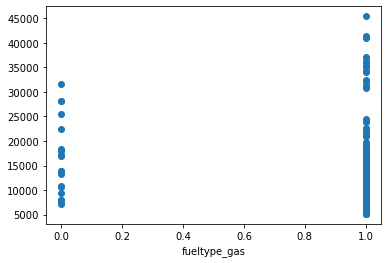

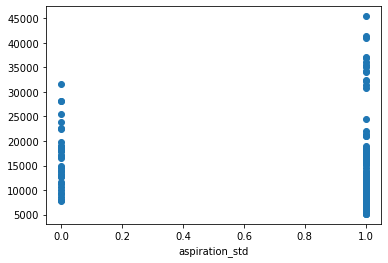

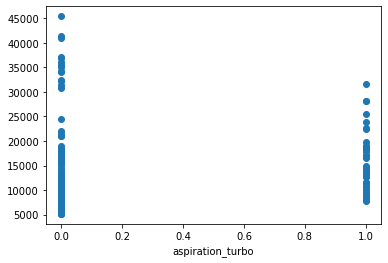

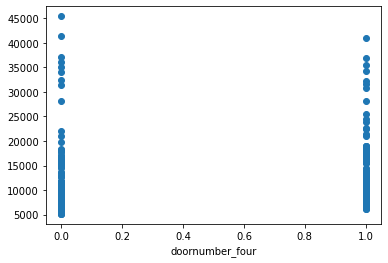

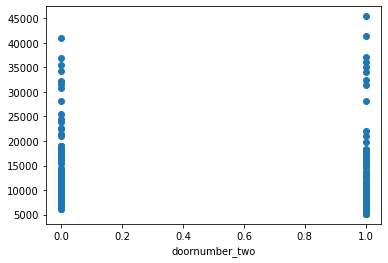

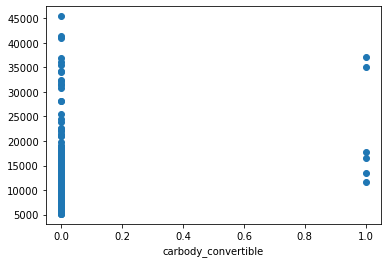

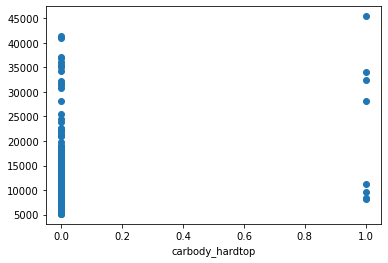

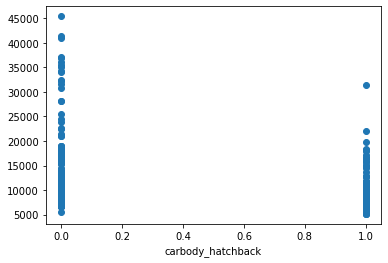

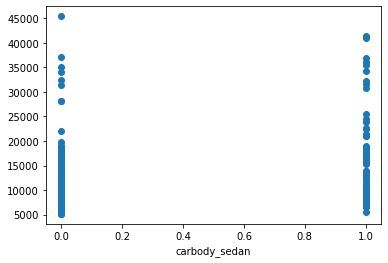

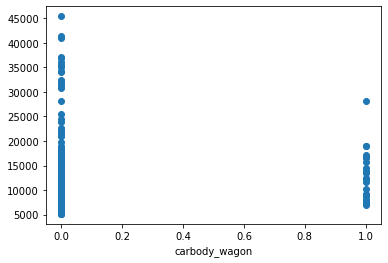

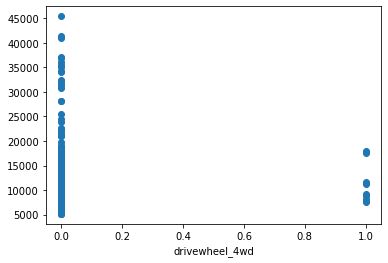

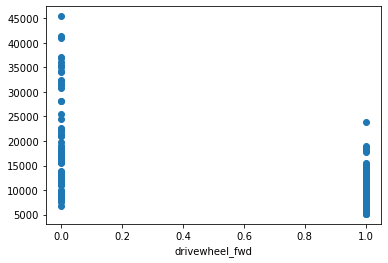

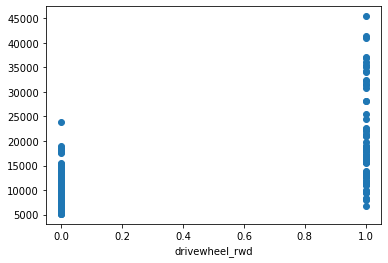

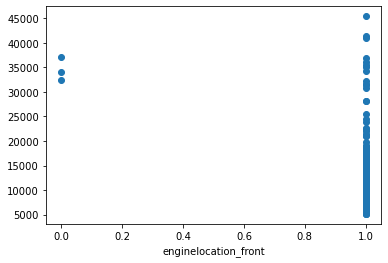

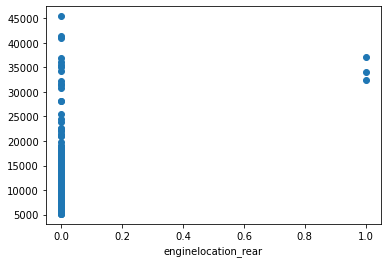

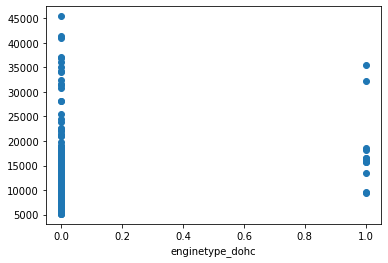

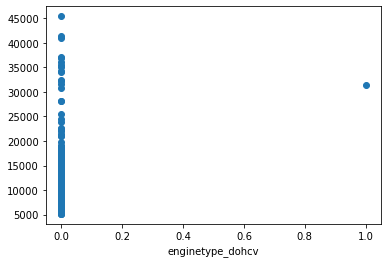

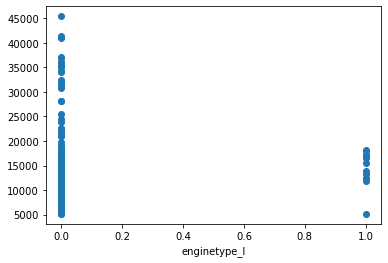

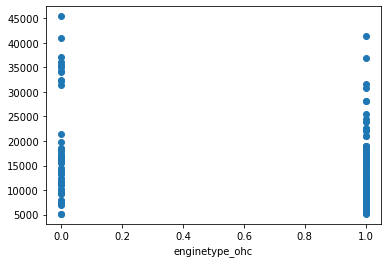

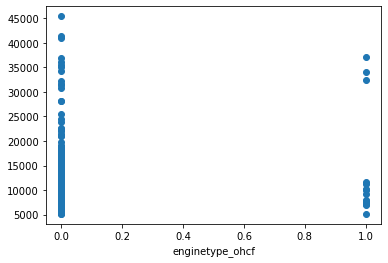

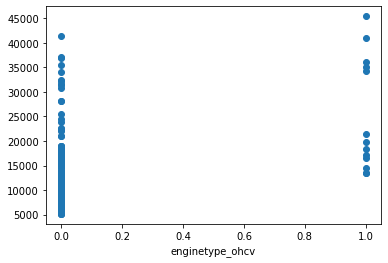

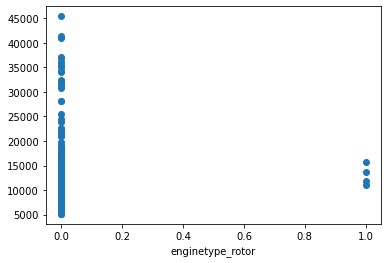

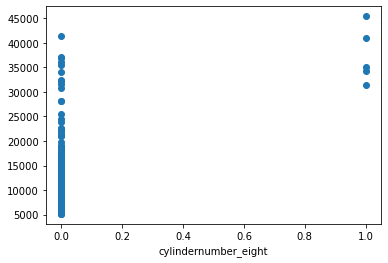

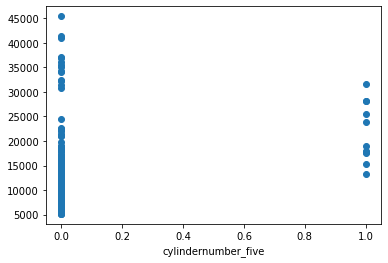

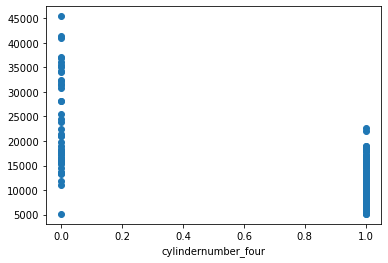

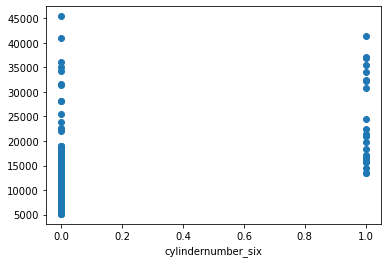

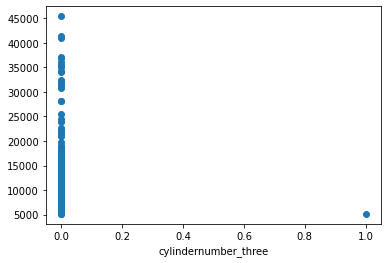

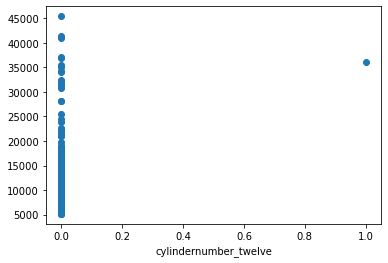

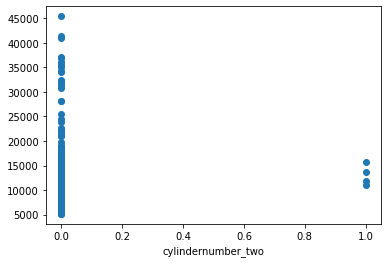

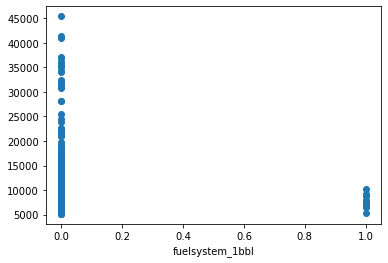

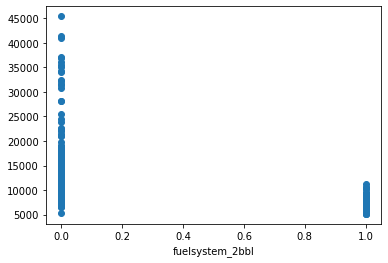

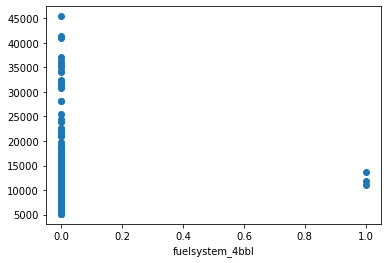

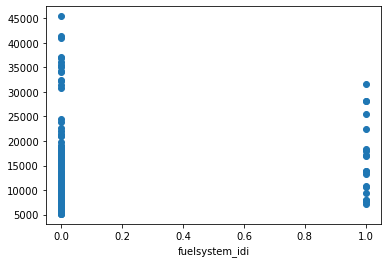

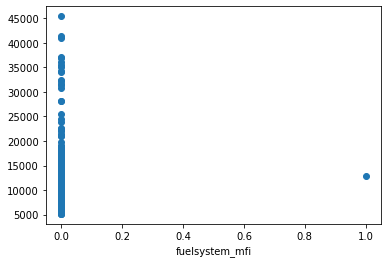

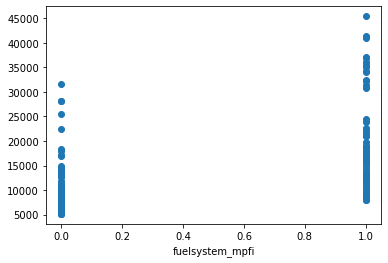

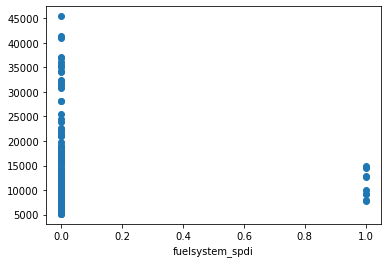

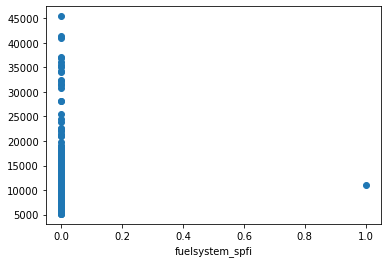

In [11]:
for var in x.columns.values:
    plt.scatter(x[var], y)
    plt.xlabel(var)
    plt.show()

### Modelado con PyTorch

In [12]:
# 0) data preparation

x = np.array(x)
y = np.array(y)

x = torch.from_numpy(x.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer 

    # (Algorithms: Adadelta, Adagrad, Adam, AdamW, SparseAdam (for sparse tensors), 
                 # Adamax, ASGD, LBFGS (closure issue), RMSprop, Rprop, SGD)

learning_rate = 0.005

criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# 3) training loop

num_epochs = 10000000

for epoch in range(num_epochs):
    
    # forward pass and loss
    
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    # backward pass
    
    loss.backward()
    
# update
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if(epoch+1)%10000==0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.16f}")
        
predicted = model(x).detach().numpy()

print("R2 Score:", r2_score(y, predicted), "%")

epoch: 10000, loss = 12477411.0000000000000000
epoch: 20000, loss = 11143394.0000000000000000
epoch: 30000, loss = 10563634.0000000000000000
epoch: 40000, loss = 10101447.0000000000000000
epoch: 50000, loss = 9730686.0000000000000000
epoch: 60000, loss = 9430049.0000000000000000
epoch: 70000, loss = 9160125.0000000000000000
epoch: 80000, loss = 8908404.0000000000000000
epoch: 90000, loss = 8672404.0000000000000000
epoch: 100000, loss = 8450979.0000000000000000
epoch: 110000, loss = 8242931.5000000000000000
epoch: 120000, loss = 8047721.0000000000000000
epoch: 130000, loss = 7865207.5000000000000000
epoch: 140000, loss = 7694647.0000000000000000
epoch: 150000, loss = 7534735.5000000000000000
epoch: 160000, loss = 7384385.5000000000000000
epoch: 170000, loss = 7241934.5000000000000000
epoch: 180000, loss = 7106046.0000000000000000
epoch: 190000, loss = 6976052.0000000000000000
epoch: 200000, loss = 6851671.5000000000000000
epoch: 210000, loss = 6732603.5000000000000000
epoch: 220000, los

epoch: 1740000, loss = 3732576.7500000000000000
epoch: 1750000, loss = 3731624.5000000000000000
epoch: 1760000, loss = 3730687.5000000000000000
epoch: 1770000, loss = 3729764.5000000000000000
epoch: 1780000, loss = 3728854.7500000000000000
epoch: 1790000, loss = 3727963.5000000000000000
epoch: 1800000, loss = 3727086.5000000000000000
epoch: 1810000, loss = 3726222.2500000000000000
epoch: 1820000, loss = 3725375.0000000000000000
epoch: 1830000, loss = 3724539.0000000000000000
epoch: 1840000, loss = 3723708.5000000000000000
epoch: 1850000, loss = 3722887.5000000000000000
epoch: 1860000, loss = 3722083.5000000000000000
epoch: 1870000, loss = 3721292.2500000000000000
epoch: 1880000, loss = 3720519.2500000000000000
epoch: 1890000, loss = 3719754.0000000000000000
epoch: 1900000, loss = 3719007.7500000000000000
epoch: 1910000, loss = 3718273.5000000000000000
epoch: 1920000, loss = 3717553.7500000000000000
epoch: 1930000, loss = 3716841.7500000000000000
epoch: 1940000, loss = 3716141.000000000

epoch: 3450000, loss = 3658114.7500000000000000
epoch: 3460000, loss = 3657871.2500000000000000
epoch: 3470000, loss = 3657636.0000000000000000
epoch: 3480000, loss = 3657389.2500000000000000
epoch: 3490000, loss = 3657149.0000000000000000
epoch: 3500000, loss = 3656909.0000000000000000
epoch: 3510000, loss = 3656676.5000000000000000
epoch: 3520000, loss = 3656441.2500000000000000
epoch: 3530000, loss = 3656213.0000000000000000
epoch: 3540000, loss = 3655985.0000000000000000
epoch: 3550000, loss = 3655760.5000000000000000
epoch: 3560000, loss = 3655538.2500000000000000
epoch: 3570000, loss = 3655318.5000000000000000
epoch: 3580000, loss = 3655098.0000000000000000
epoch: 3590000, loss = 3654876.7500000000000000
epoch: 3600000, loss = 3654665.0000000000000000
epoch: 3610000, loss = 3654446.0000000000000000
epoch: 3620000, loss = 3654237.7500000000000000
epoch: 3630000, loss = 3654027.7500000000000000
epoch: 3640000, loss = 3653819.2500000000000000
epoch: 3650000, loss = 3653615.250000000

epoch: 5160000, loss = 3630475.5000000000000000
epoch: 5170000, loss = 3630362.7500000000000000
epoch: 5180000, loss = 3630256.7500000000000000
epoch: 5190000, loss = 3630150.2500000000000000
epoch: 5200000, loss = 3630044.0000000000000000
epoch: 5210000, loss = 3629939.7500000000000000
epoch: 5220000, loss = 3629842.0000000000000000
epoch: 5230000, loss = 3629739.5000000000000000
epoch: 5240000, loss = 3629638.7500000000000000
epoch: 5250000, loss = 3629527.5000000000000000
epoch: 5260000, loss = 3629424.5000000000000000
epoch: 5270000, loss = 3629323.7500000000000000
epoch: 5280000, loss = 3629228.2500000000000000
epoch: 5290000, loss = 3629126.5000000000000000
epoch: 5300000, loss = 3629029.7500000000000000
epoch: 5310000, loss = 3628931.0000000000000000
epoch: 5320000, loss = 3628825.0000000000000000
epoch: 5330000, loss = 3628724.7500000000000000
epoch: 5340000, loss = 3628629.2500000000000000
epoch: 5350000, loss = 3628526.5000000000000000
epoch: 5360000, loss = 3628438.750000000

epoch: 6870000, loss = 3618029.2500000000000000
epoch: 6880000, loss = 3617978.7500000000000000
epoch: 6890000, loss = 3617925.5000000000000000
epoch: 6900000, loss = 3617882.7500000000000000
epoch: 6910000, loss = 3617833.7500000000000000
epoch: 6920000, loss = 3617790.2500000000000000
epoch: 6930000, loss = 3617737.0000000000000000
epoch: 6940000, loss = 3617695.5000000000000000
epoch: 6950000, loss = 3617643.7500000000000000
epoch: 6960000, loss = 3617602.5000000000000000
epoch: 6970000, loss = 3617556.2500000000000000
epoch: 6980000, loss = 3617510.0000000000000000
epoch: 6990000, loss = 3617459.5000000000000000
epoch: 7000000, loss = 3617413.5000000000000000
epoch: 7010000, loss = 3617365.5000000000000000
epoch: 7020000, loss = 3617316.2500000000000000
epoch: 7030000, loss = 3617269.7500000000000000
epoch: 7040000, loss = 3617232.0000000000000000
epoch: 7050000, loss = 3617180.5000000000000000
epoch: 7060000, loss = 3617141.5000000000000000
epoch: 7070000, loss = 3617093.250000000

epoch: 8580000, loss = 3612452.7500000000000000
epoch: 8590000, loss = 3612429.5000000000000000
epoch: 8600000, loss = 3612412.5000000000000000
epoch: 8610000, loss = 3612390.7500000000000000
epoch: 8620000, loss = 3612371.2500000000000000
epoch: 8630000, loss = 3612358.5000000000000000
epoch: 8640000, loss = 3612345.5000000000000000
epoch: 8650000, loss = 3612319.2500000000000000
epoch: 8660000, loss = 3612295.2500000000000000
epoch: 8670000, loss = 3612279.2500000000000000
epoch: 8680000, loss = 3612260.7500000000000000
epoch: 8690000, loss = 3612245.5000000000000000
epoch: 8700000, loss = 3612233.0000000000000000
epoch: 8710000, loss = 3612211.7500000000000000
epoch: 8720000, loss = 3612193.5000000000000000
epoch: 8730000, loss = 3612177.2500000000000000
epoch: 8740000, loss = 3612163.7500000000000000
epoch: 8750000, loss = 3612144.7500000000000000
epoch: 8760000, loss = 3612123.7500000000000000
epoch: 8770000, loss = 3612103.7500000000000000
epoch: 8780000, loss = 3612097.500000000